In [58]:
%matplotlib inline
import everest
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.constants import R_sun, R_earth

DEBUG [matplotlib.pyplot.switch_backend()]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [68]:
b = 0.60
inc = 88.3

b / np.cos(np.radians(inc))

20.225007192640714

In [69]:
# Mann 2016: 210490365
# Mann 2017: 211990866, 211913977, 211970147, 211822797, 211969807, 211901114 (not in NEA?), 211916756
# Mann 2018: 247589423
# Rizzuto 2018: 211964830 (C16 not in EVEREST)

epic= [210490365, 211990866, 211913977, 211970147, 211822797,
       211969807, 211916756, 247589423, 247589423, 247589423]
per = [3.484552, 1.673833, 14.677286, 9.915615, 21.169619, 
       1.974238, 10.134016, 7.975292, 17.307137, 25.575065]
rp  = [0.1065, 0.0269, 0.026134, 0.0170, 0.0336, 
       0.0365, 0.08530, 0.0137, 0.0401, 0.0201]
t0  = [2457062.57935, 2457140.72062, 2457152.68135, 2457139.65518, 2457123.23803, 
       2457140.38117, 2457150.87837, 2457817.75631, 2457812.71770, 2457780.81164]
inc = [88.3, 85.1, 89.4, 89.0, 89.73, 
       88.00, 89.4, 89.3, 89.6, 89.4]
ecc = [0.27, 0.24, 0.10, 0.10, 0.18, 
       0.09, 0.16, 0.10, 0.13, 0.14]
w   = [62.0, 29, 0.00, -1.00, 0.0, 
       6.24, -2.00, 12, 24, 2]
a   = [20.225, 6.2, 32.5, 25.3, 46.7, 
       11.0, 18.27, 23.1, 39.0, 50.7]
mstar = [0.294, 1.23, 0.80, 0.77, 0.663459,
         0.426533, 0.44, 0.74, 0.74, 0.74]
mstar_err = [0.021, 0.02, 0.06, 0.06, 0.066346,
             0.06, 0.01, 0.02, 0.02, 0.02]
rstar = [0.295, 1.22, 0.73, 0.71, 0.571699, 
         0.492279, 0.42, 0.66, 0.66, 0.66]
rstar_err = [0.020, 0.02, 0.03, 0.03, 0.02, 
             0.03, 0.01, 0.02, 0.02, 0.02]

table = Table([epic, per, rp, t0, inc, ecc, w, a, mstar, mstar_err, rstar, rstar_err], 
              names="EPIC per rp t0 inc ecc w a mstar mstar_err rstar rstar_err".split())

In [71]:
# for i in range(len(table)):
#     star = everest.Everest(table['EPIC'][i])
#     np.save("data/{0}".format(table['EPIC'][i]), np.vstack([star.time, star.flux]))

In [72]:
table.write('data/zeit.csv')

WARNING [astropy._showwarning()]: AstropyDeprecationWarning: data/zeit.csv already exists. Automatically overwriting ASCII files is deprecated. Use the argument 'overwrite=True' in the future.


In [ ]:
table

In [41]:
dressing_stars = Table.read('data/dressing2013_stars.vot', format='votable')
dressing_planets = Table.read('data/dressing2013_planets.vot', format='votable')

WARNING [astropy._showwarning()]: W27: data/dressing2013_stars.vot:58:2: W27: COOSYS deprecated in VOTable 1.2
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:83:4: W03: Implicitly generating an ID from a name 'R*' -> 'R_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:86:4: W03: Implicitly generating an ID from a name 'E_R*' -> 'E_R_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:89:4: W03: Implicitly generating an ID from a name 'e_R*' -> 'e_R_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:92:4: W03: Implicitly generating an ID from a name 'M*' -> 'M_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:95:4: W03: Implicitly generating an ID from a name 'E_M*' -> 'E_M_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_stars.vot:98:4: W03: Implicitly generating an ID from a name 'e_M*' -> 'e_M_'
WARNING [astropy._showwarning()]: W50: data/dressing2013_stars.vot:101:4: W50: Invalid 

WARNING [astropy._showwarning()]: W03: data/dressing2013_planets.vot:69:4: W03: Implicitly generating an ID from a name 'a/r*' -> 'a_r_'
WARNING [astropy._showwarning()]: W03: data/dressing2013_planets.vot:72:4: W03: Implicitly generating an ID from a name 'rp/r*' -> 'rp_r_'
WARNING [astropy._showwarning()]: W50: data/dressing2013_planets.vot:87:4: W50: Invalid unit string 'Earth'
WARNING [astropy._showwarning()]: W50: data/dressing2013_planets.vot:90:4: W50: Invalid unit string 'Earth'
WARNING [astropy._showwarning()]: W50: data/dressing2013_planets.vot:93:4: W50: Invalid unit string 'Earth'
WARNING [astropy._showwarning()]: W03: data/dressing2013_planets.vot:99:4: W03: Implicitly generating an ID from a name 'R*' -> 'R_'


In [44]:
from astropy.table import join

dressing = join(dressing_stars, dressing_planets, keys='KIC')

WARNING [astropy._showwarning()]: MergeConflictWarning: In merged column 'KIC' the 'description' attribute does not match (Kepler Input Catalog ID (V/133) != Kepler identifier (V/133)).  Using Kepler identifier (V/133) for merged output
WARNING [astropy._showwarning()]: MergeConflictWarning: Cannot merge meta key 'name' types <class 'str'> and <class 'str'>, choosing name='J/ApJ/767/95/table2'
WARNING [astropy._showwarning()]: MergeConflictWarning: Cannot merge meta key 'ID' types <class 'str'> and <class 'str'>, choosing ID='J_ApJ_767_95_table2'
WARNING [astropy._showwarning()]: MergeConflictWarning: Cannot merge meta key 'description' types <class 'str'> and <class 'str'>, choosing description='Revised properties for planet candidates orbiting small star'


In [51]:
dressing.write('data/dressing_joined.csv')

DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos


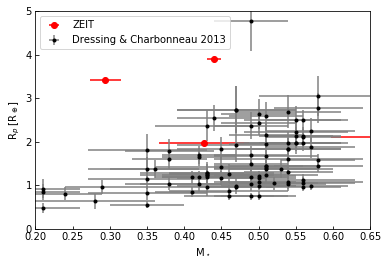

In [65]:
plt.errorbar(table['mstar'], table['rp']*(table['rstar']*R_sun)/R_earth, xerr=table['mstar_err'], 
             fmt='o', color='r', ecolor='r', label='ZEIT')

plt.errorbar(dressing["M_"], dressing['Rp'], xerr=dressing['E_M_'], yerr=dressing['e_Rp'], 
             fmt='.', color='k', ecolor='gray', label='Dressing & Charbonneau 2013')
plt.ylim([0, 5])
plt.xlim([0.2, 0.65])
plt.xlabel('M$_\star$')
plt.ylabel('R$_p$ [R$_\oplus$]')
plt.legend()